### Библиотеки

In [1]:
import pickle

In [2]:
from Experiment_6_part2_advection import *

### Описание эксперимента:

######  - Разбираюсь со сдвигом по врмени

In [3]:
def count_ones(v_coarse,verbose=False):
    
    all_sums=[]
    for j in range(0,len(v_coarse[0,:]),1):
        all_sums.append(v_coarse[:,j].sum())
    
    if verbose:
        print(all_sums)
    assert np.sum(all_sums)%v_coarse.shape[1]==0, 'Неправильно подобран n'
    return all_sums[0]

def check_ones_continuous(v_coarse_orig,ones,verbose=False,plt_flg=False):
    
    v_coarse=copy.copy(v_coarse_orig)
    v_coarse_shifted=v_coarse.T[1:]
    v_coarse=v_coarse.T[:-1]
    diff=v_coarse_shifted-v_coarse
    
    ones=int(ones)
    
    def my_plot(k):
        plt.figure(figsize=(10,6))
        plt.plot(v_coarse[k],'-*',color='red',label='t')
        plt.plot(v_coarse_shifted[k],'--*',color='green',label='t+1')
        plt.title(k)
        plt.legend()
        plt.grid()
        plt.show()
    
    for k in range(len(v_coarse)):
        
        print(fr'----------{k}----------')
        
        start=np.where(diff[k]==-1)[0]
        end=np.where(diff[k]==1)[-1]
        
        if len(start)==1 or len(end)==1:
            
            start=start[0]
            end=end[0] 
            diff_mask=diff[k][start:end+1]
            
            if plt_flg:
                my_plot(k)
                
            if verbose==True:
                print(start,end)
                print('mask',diff_mask)
            

            if len(diff_mask)!=len(np.array([-1]+[0]*(ones-1)+[1])):
                assert 1==2, 'Не выполняется условие непрерывности (длина)'
            elif (diff_mask!=np.array([-1]+[0]*(ones-1)+[1])).all():
                if verbose:
                    display(diff_mask)
                assert 1==2, 'Не выполняется условие непрерывности (значения)'
        
        elif len(start)>1:
            if plt_flg:
                my_plot(k)
            if verbose==True:
                print(start,end)
            assert 1==2,'stop point 1_start'
            
        elif len(start)<1:
            if plt_flg:
                my_plot(k)
            if verbose==True:
                print(start,end)
            assert 1==2,'stop point 2_start'
                
        elif len(end)>1:
            print()
            if plt_flg:
                my_plot(k)
            if verbose==True:
                print(start,end)
            assert 1==2,'stop point 2_end'
                
        # elif len(end)<1:
        #     print('2_end')
        #     if plt_flg:
        #         my_plot(k)
        
        # else:
            # break

### 0. Параметры для генерации данных

In [4]:
generate_flg=True # True - генерация, False - чтение уже сгенерированных
# generate_flg=False

n=21 #число узлов
L=1 # длина расчт области
T=.85 #конечное время
kurant=1

h=L/(n-1)
b=(n-1)*0.1*L #width % of L (длина участка с v=1, составляет 10% от расчт области)
# b=4
v=[1 if i in range(1,int(b)+1) else 0 for i in range(0,n) ]
print('Доля единиц:',np.round(100*v.count(1)/len(v),3))

Доля единиц: 9.524


In [5]:
# epochs_lst=[1,10,100,1_000,5_000,10_000]
epochs_lst=[1]

### 1. Генерация данных

In [6]:
v_fact,x_lst,tau,time_lst=generate_data(generate_flg,v,T,L,1,h,n,save_flg=False)

tau 0.05
tau = 0.05
Генерация данных


100%|████████████████████████████████████████████████████████████████████████████████| 18/18 [00:00<00:00, 1779.89it/s]

tau 0.05
tau 0.05
tau 0.05
tau 0.05
tau 0.05
tau 0.05
tau 0.05
tau 0.05
tau 0.05
tau 0.05
tau 0.05
tau 0.05
tau 0.05
tau 0.05
tau 0.05
tau 0.05
tau 0.05
tau 0.05
18 21
21 18


Text(0.5, 1.0, 'Фактические данные')

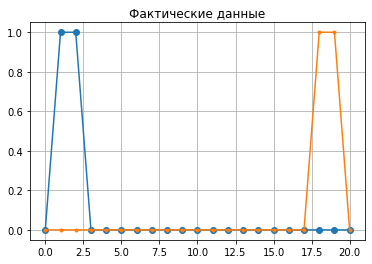

In [7]:
#view
plt.plot(v_fact[:,0],'o-')
plt.plot(v_fact[:,-1],'.-')
plt.grid()
plt.title('Фактические данные')

### 2. Сабсемплинг

In [8]:
t_factor = 1  # time subsample factor 
s_factor = 1  # space subsample factor
Tsim=len(v_fact[0])
dxc,dtc,coarse_t,coarse_x,v_coarse,Lxc,\
Ltc,v_coarse_train,v_coarse_test=subsampling(s_factor,t_factor,h,tau,Tsim,n,v_fact,train_split=train_split)

full_sample (21, 18)
train (21, 9)
test (21, 9)


In [9]:
dxc==dtc, dxc

(True, 0.05)

Text(0.5, 1.0, 'Фактические данные после сабсемплинга')

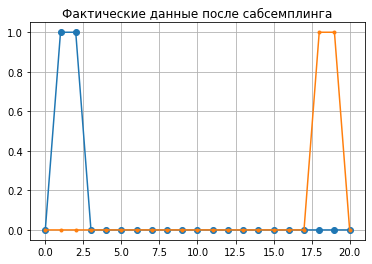

In [10]:
#view
plt.plot(v_coarse[:,0],'o-')
plt.plot(v_coarse[:,-1],'.-')
plt.grid()
plt.title('Фактические данные после сабсемплинга')

[2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0]
----------0----------


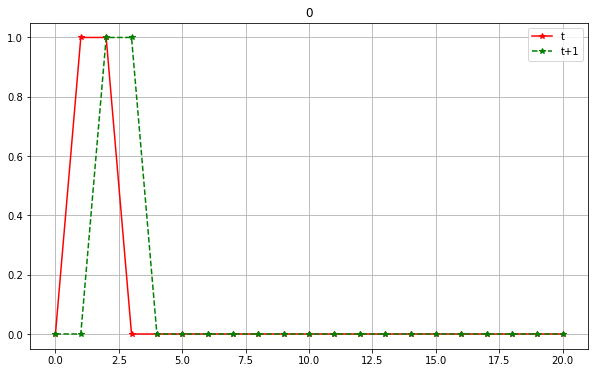

1 3
mask [-1.  0.  1.]
----------1----------


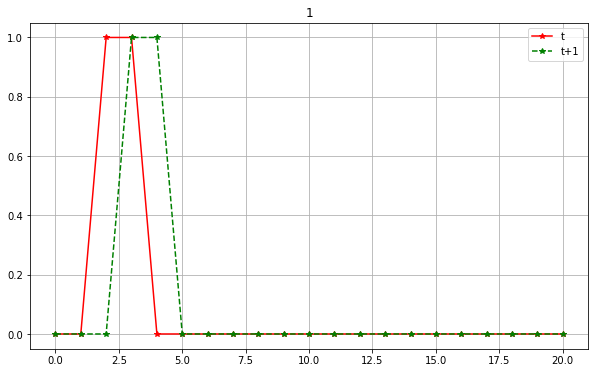

2 4
mask [-1.  0.  1.]
----------2----------


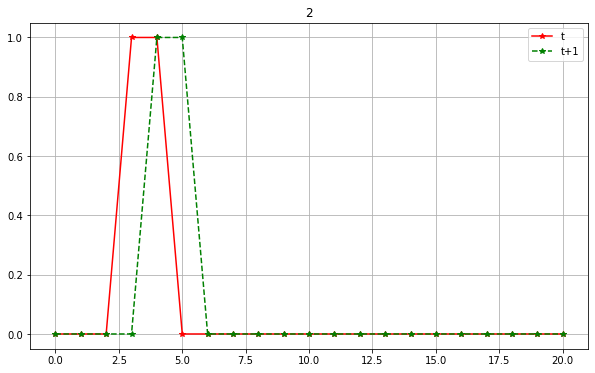

3 5
mask [-1.  0.  1.]
----------3----------


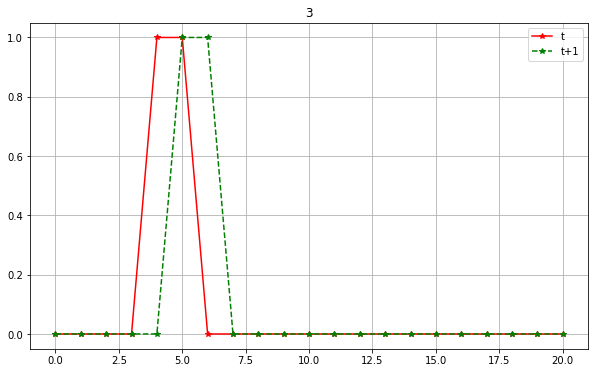

4 6
mask [-1.  0.  1.]
----------4----------


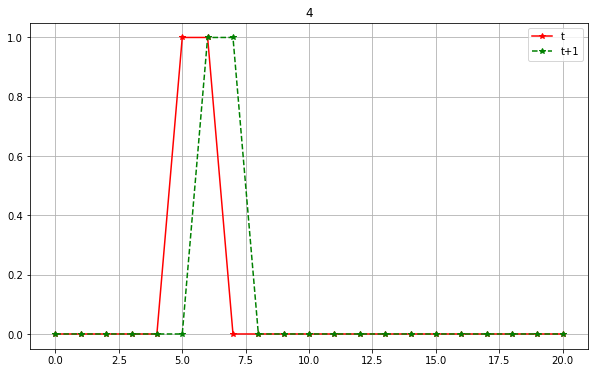

5 7
mask [-1.  0.  1.]
----------5----------


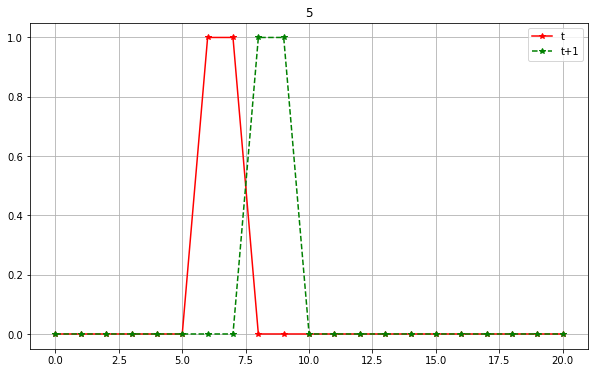

[6 7] [8 9]


AssertionError: stop point 1_start

In [11]:
ones=count_ones(v_coarse,verbose=True)
count_ones(v_fact,verbose=False)
check_ones_continuous(v_coarse,ones,verbose=True,plt_flg=True)
check_ones_continuous(v_fact,ones,verbose=False,plt_flg=False)

In [ ]:
np.arange(0,T+tau,tau)

In [ ]:
tau

##### CHECK : проверяю что после сабсемплинга нет сдвига

In [ ]:
for i in v_coarse-v_fact:
    if max(i)!=0:
        print(i)

In [ ]:
dxc

### 3. Тренировка модели

In [ ]:
for epochs in epochs_lst:
    
    net, loss_lst,loss=train_net(MLPConv,v_coarse_train,epochs,dtc,
              fs,
              neurons,
              hidden_layers_num,
              lr,
              m,
              has_backward,
              method,
              decay_const
             )
    
    pickle.dump(net, open(fr'Experiment_6_part2_advection/models/net_epochs={epochs}', 'wb'))
    

### 4. Симуляция прогноза моделью

In [ ]:
NN_sim_lst=[]

weights=[]
biases=[]

for epochs in epochs_lst:
    
    net = pickle.load(open(fr'Experiment_6_part2_advection/models/net_epochs={epochs}', 'rb'))
    
    NN_sim,T_sim,x_sim=make_simulation(net,v_coarse,L,Lxc,dtc,method='E1')
    
    NN_sim_lst.append(NN_sim)
    
    weights.append(net.layer[0].weight.data.numpy())
    biases.append(None)

In [ ]:
pd.DataFrame({'epoch':epochs_lst+[['finite_diff_methods']],
              'coefs':weights+[[1/((dxc)),-1/(dxc),0]],
              'bias':biases+[[None]]})

In [ ]:
print(dxc)

### 5. Результаты

In [ ]:
# view_results(T_sim,x_sim,NN_sim,v_coarse,T,dtc,n=10,fix_axes=True)

# view_result_imshow(NN_sim,v_coarse,T,dtc,L,dxc,figsize=(10,10))

folder='Experiment_6_part2_advection'

for i in range(len(epochs_lst)):
    
    print(fr'---------------Epochs = {epochs_lst[i]}-------------------')
    view_results(T_sim,x_sim,NN_sim_lst[i],v_coarse,T,dtc,n=10,fix_axes=True,
                epochs=epochs_lst[i],
                save_path = fr'{folder}/graphs2/',
                save_name = fr'Result_epoch={epochs_lst[i]}',
                view_flag=False)
    view_result_metric(NN_sim_lst[i],v_coarse,T,dtc,L,dxc,
                       n_xticks=10,
                       save_path = fr'{folder}/graphs2/',
                save_name = fr'Metric_epoch={epochs_lst[i]}')

    make_gif(folder=fr'{folder}/graphs2/',epochs=epochs_lst[i])

    print('\n')
print('done')

In [ ]:
net.layer[0].weight

In [ ]:
diff=NN_sim_lst[0]-v_coarse

for j in range(len(diff[0,:])): 
    if max(diff[:,j])!=0:
        plt.figure()
        plt.plot(diff[:,j],'-*')
        plt.title(str(j)+' / '+str(len(diff[0,:])))
        plt.grid()
        
        plt.figure()
        plt.plot(NN_sim_lst[0][:,j],'-*',label='NN_sim')
        plt.plot(v_coarse[:,j],'-*',label='v_coarse')
        plt.legend()
        plt.grid()
        
        break

In [ ]:
for j in range(5,7):
        plt.plot(NN_sim_lst[0][:,j],'-*',color='red',label=fr'NN_sim_{j}')
        # plt.plot(v_coarse[:,j],'--*',color='blue',label=fr'v_coarse_{j}')
        plt.plot(v_fact[:,j],'--*',color='green',label=fr'v_coarse_{j}')
        plt.legend()
        plt.grid()